<h1 align="center">INDIAN CROP RECOMENDATION SYSTEM</h1> 
<img src="India-promising.jpg" width="1800" height="100">

- Agriculture is an important part of India's economy and at present it is among the <b>top two</b> farm producers in the world. This sector provides approximately <b>52 percent</b> of the total number of <b>jobs available in India</b> and contributes around <b>16 percent</b> to the GDP. Agriculture is the only means of living for almost two-thirds of the employed class in India. As being stated by the economic data of financial year 2006-07, agriculture has acquired <b>18 percent of India's GDP</b>. The agriculture sector of India has occupied almost <b>43percent of India's geographical area</b>. 
- India is one among the oldest countries which is still practicing agriculture. But in recent times the trends in agriculture has drastically <b>evolved</b> due to globalization. Various factors have affected the health of agriculture in India. Many new technologies have been evolved to regain the health. One such technique is <b>precision agriculture</b>. Precision agriculture is budding in India .Precision agriculture is the technology of “site-specific” farming. It has provided us with the advantage of <b>efficient input, output and better decisions regarding farming</b>. Although precision agriculture has delivered better improvements it is still facing certain issues. There exist many systems which propose the inputs  for  a particular farming land.syastem propose crops, fertilizers and even farming techniques. <b>Recommendation of crops</b> is one major domain in precision agriculture. Recommendation of crops is dependent on various parameters.

- In this notebook we will see what are the main inputs of land and based on that input we will recommend the suitable crop.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from wordcloud import WordCloud
import numpy as np

In [4]:
warnings.filterwarnings('ignore')

# Data cleaning and Feature engineering

In [5]:
#load data
data = pd.read_csv('Crop_recommendation.csv')

In [6]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [7]:
#checking for null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
#Renaming the coloumn names 
data.rename(columns={'N':'Nitrogen','P':'Phosphorus','K':'Potassium(K)'},inplace=True)

In [10]:
#Rounding the values into two decimal points  of temperature , humudity , ph and rainfall beacuse it contains many decimal values
data[['temperature','humidity','ph','rainfall']] =  data[['temperature','humidity','ph','rainfall']].round(decimals=2)

In [11]:
data.head()

,Nitrogen,Phosphorus,Potassium(K),temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


<img src="Screenshot 2021-03-05 103430.png" width="800" height="400">

###### According to this chart we will add a coloumn called 'SOIL TYPE' this will help in model building

In [12]:
#Adding new coloumn which contain three types of soil (acidic , neutral and Alkaline) based on above chart
soil_type_list = []
for i in range(len(data['ph'])):
    if data['ph'][i]<6.5:
        soil_type_list.append('acidic')
    elif 6.6 <= data['ph'][i] <= 7.3:
        soil_type_list.append('Neutral')
    else:
        soil_type_list.append('Alkaline')

data['Soil_type_based_on_ph']=soil_type_list        

In [13]:
#Adding new coloumn "Nutrious_value" this contains the total sum of N-P-K values
data['Nutrious_value'] = data['Nitrogen']+data['Potassium(K)']+data['Phosphorus']

In [14]:
data.head()

,Nitrogen,Phosphorus,Potassium(K),temperature,humidity,ph,rainfall,label,Soil_type_based_on_ph,Nutrious_value
0,90,42,43,20.88,82.00,6.50,202.94,rice,Alkaline,175
1,85,58,41,21.77,80.32,7.04,226.66,rice,Neutral,184
2,60,55,44,23.00,82.32,7.84,263.96,rice,Alkaline,159
3,74,35,40,26.49,80.16,6.98,242.86,rice,Neutral,149
4,78,42,42,20.13,81.60,7.63,262.72,rice,Alkaline,162


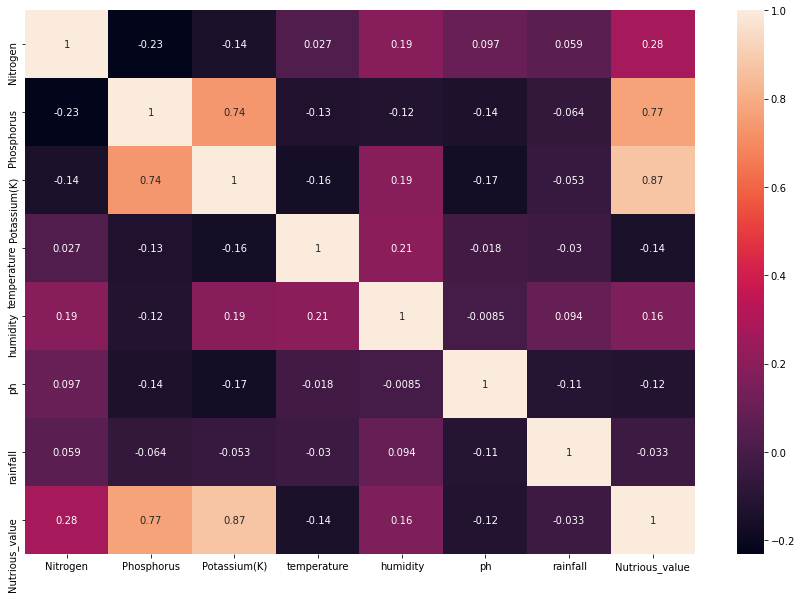

In [15]:
# corealation
corelation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corelation,annot=True);

In [79]:
# todo add relation between potassium and posporous

# Data Analysis

## Rainfall

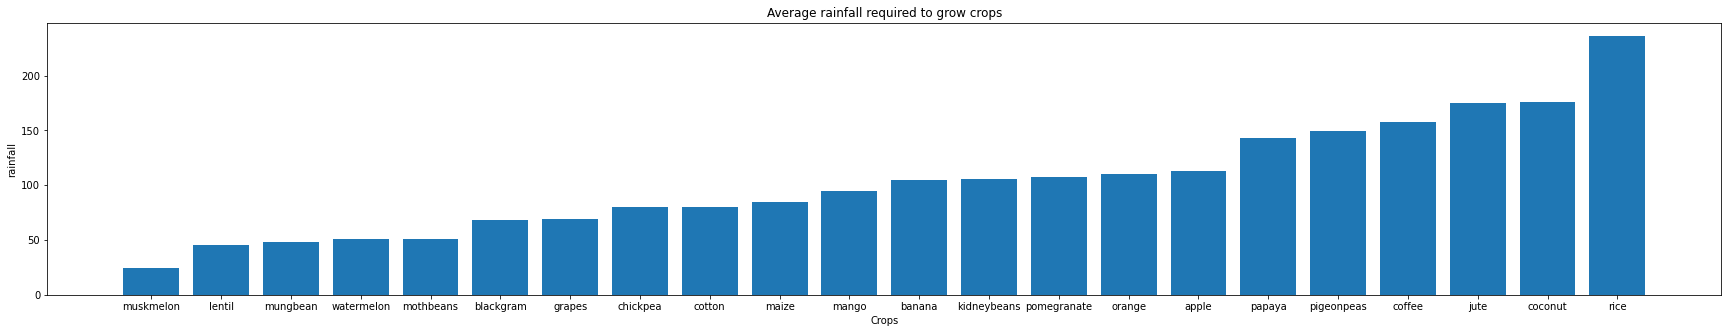

In [16]:
# Average hunudity required to grow crops
plt.figure(figsize=[30,5])
df =  data.groupby('label',as_index=False).mean()
rainfall = df[['label','rainfall']].sort_values('rainfall')
plt.bar(rainfall['label'],rainfall['rainfall'])
plt.ylabel('rainfall')
plt.xlabel('Crops')
plt.title('Average rainfall required to grow crops');

- Compared to other crops <b>Rice</b> required more rainfall with an average of <b>236cm</b> , In india top rice producing states are <b>West bengal , Uttar Pradesh and  Punjab </b>. 
- Canals constitute an important source of irrigation in Uttar Pradesh.  But the amount of rainfall, especially in western parts of the state, is not sufficient for sustained agricultural growth.Therefore, a large number of canals have been constructed to provide regular supply of sufficient water to the crops. Uttar Pradesh has about 3,091 thousand hectares under canal irrigation which is 30.91 per cent of the total canal irrigated area of the country. Over one-fourth of the net irrigated area of the state is irrigated by canals. 
- As per the information available on the website of Ministry of Agriculture & Cooperation, Government of India, the percentage of cultivated land area that is covered by the Irrigation in different areas of Punjab is about 97.03%. 
- West bengal is the state which has the 9th highest rainfall in india




TODO add about muskmelon

## pH value

- Soil pH is the value measure of <b>acidity</b> and <b>alkalinity</b> it possess. Soil pH value is considered as one of the most vital factor which may determine the yield of the crops. Soil pH is important because a soil’s acidity or alkalinity determines what plant nutrients are available to plant roots. Nutrients in the soil—elements such as nitrogen, phosphorus, and potassium—become available to plants when they dissolve in water or soil moisture. Most plant nutrients will not dissolve when the soil is either too acidic or too alkaline.
- <b>Acidity</b> has the following effects on soil: It decreases the availability of plant nutrients, such as phosphorus and molybdenum, and increases the availability of some elements to toxic levels, particularly aluminium and manganese. Essential plant nutrients can also be leached below the rooting zone.

<b>Effect of pH on plant growth
- <img src="ph.jpg" width="800" height="400">

In [17]:
data.groupby('Soil_type_based_on_ph')['label'].apply(lambda x: x.value_counts().index[0]).reset_index()

,Soil_type_based_on_ph,label
0,Alkaline,chickpea
1,Neutral,papaya
2,acidic,banana


In [18]:
#TODO Show crops which are more alkaline neutral and acidic

## Temperature and Humudity

- <b>Temapreture</b> is the measure of heat wheras <b>Humidity</b> is a measure of the amount of water vapor in the air.
- <b>Effect of Temperature</b> - High temperature, even for short period, affects crop growth especially in temperate crops like wheat. High air temperature reduces the growth of shoots and in turn reduces root growth. High soil temperature is more crucial as damage to the roots is severe resulting in substantial reduction in shoot growth.
- <b>Effect of Humidity</b> - When conditions are too humid, it may promote the growth of mold and bacteria that cause plants to die and crops to fail, as well as conditions like root or crown rot. Humid conditions also invite the presence of pests, such as fungus gnats, whose larva feed on plant roots and thrive in moist soil.

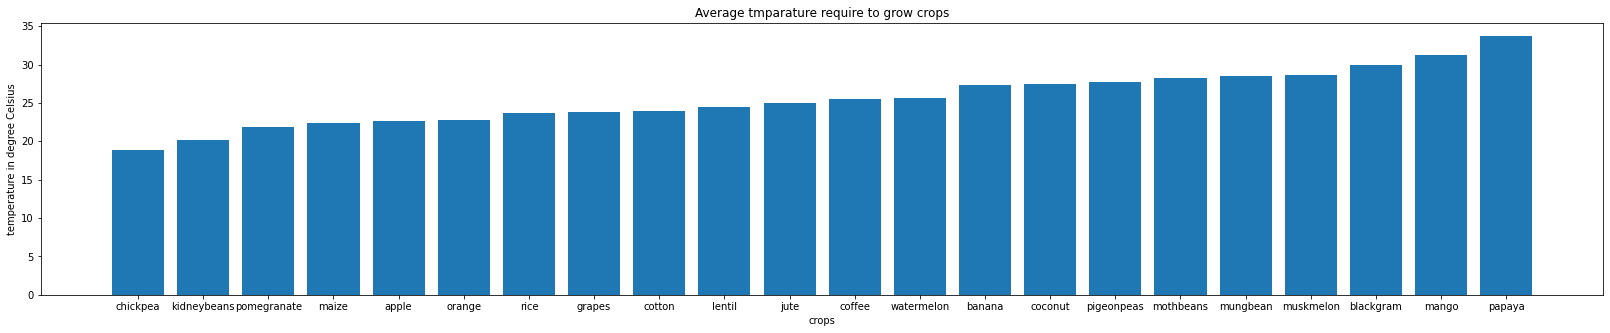

In [19]:
df = data.groupby('label',as_index=False).mean()
df = df.sort_values(by=['temperature'])
plt.figure(figsize=(28,5))
plt.bar(df['label'],df['temperature'])
plt.title('Average tmparature require to grow crops')
plt.xlabel('crops')
plt.ylabel('temperature in degree Celsius')
plt.show()

In [20]:
y = data.round().groupby('label')['temperature','humidity'].agg((['min', 'max']))

In [21]:
# TODO Add graphs showing min and max temperature and humudity ranges of each crops

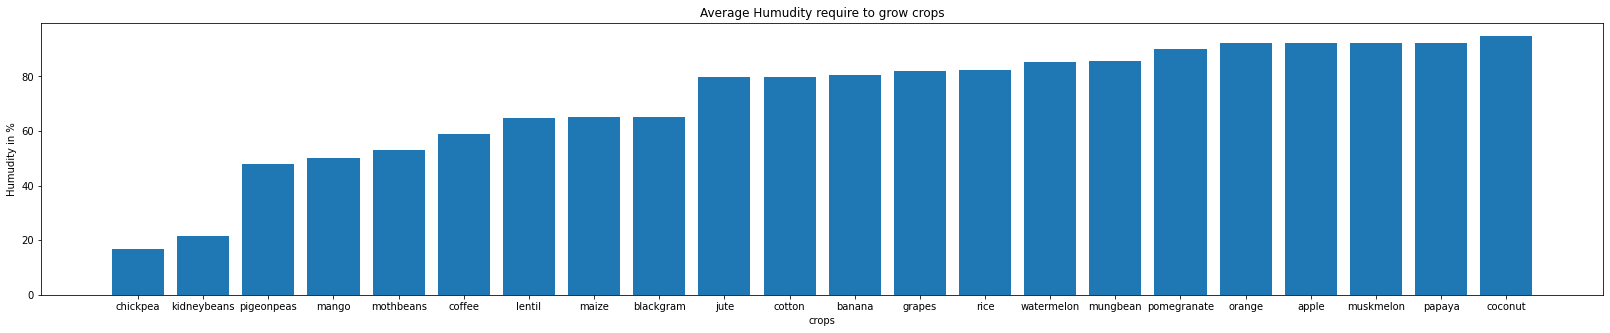

In [22]:
plt.figure(figsize=(28,5))
df = df.sort_values(by=['humidity'])
plt.bar(df['label'],df['humidity'])
plt.title('Average Humudity require to grow crops')
plt.xlabel('crops')
plt.ylabel('Humudity in %')
plt.show()

<b> Why apple is grown more in Jammu and kashmir </b>

- The apple is a <b>temperate fruit crop</b>. However, in India the apple growing areas do not fall in temperate zone but the prevailing temperate climate of the region is due to the <b>Himalayan ranges and high altitudes</b>.
- The average summer temperature should be around <b>21-24 C</b> during active growth period.
- Apples grow best on a well-drained, loam soils having a depth of 45 cm and a pH range of pH <b>5.5-6.5</b>
- Apples grow best on <b>Medium</b> to <b> High</b> <b>Humidity</b>
- Apples require an average of <b>100-150cm</b> of rainfall

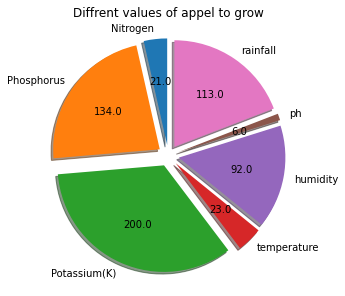

In [47]:
df = data.groupby('label').mean()
df.drop('Nutrious_value',axis=1,inplace = True)
df.round(0)
# Pie chart
labels = df.columns
sizes = (df.iloc[0])
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)  
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=absolute_value,
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Diffrent values of appel to grow')
plt.show()

<b> Why cofee is grown in very less regions in india </b>

- Coffee is a <b>tropical plant</b> which is also grown in semi-tropical climate. The coffee tree requires heat, humidity and abundant rainfall.
- Coffee requires an average temperature between <b>20°-27°C.</b> , Growth is most rapid during hot rainy season and during cool dry season berries ripen and ready for picking. Bright sunshine and warm weather are necessary for the harvesting.
- Coffee needs abundant rainfall, i.e., <b>100 to 200cm</b> annually. The hill slopes which receive orographic rainfall are thus best for coffee cultivation.
- <b>Direct sunlight</b> is harmful for coffee plants; therefore, these are planted under shade of taller trees such as bananas.

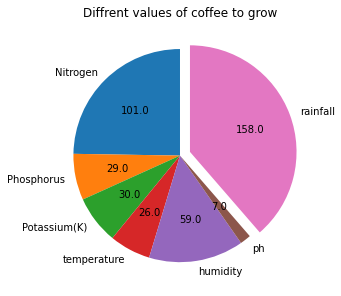

In [53]:
# Pie chart
labels = df.columns
sizes = (df.iloc[5])
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0,0,0,0.1)  
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=absolute_value,
          startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Diffrent values of coffee to grow')
plt.show()

## Nutrients in soil

- Macronutrients are <b>nitrogen (N), phosphorus (P), potassium (K), calcium (Ca), magnesium (Mg) and sulfur (S).</b> 
- The nutrients that are required by crops in the largest amounts are <b>Nitrogen</b>, <b>Phosphorus</b> and <b>Potassium(K)	</b>. For that reason, they are often considered as the <b>most important nutrients</b>.
- The main functions of N and P are that they are constituents of <b>proteins</b> and <b>nucleic acids</b>, which are important components of <b>plant tissue.</b> K is the only nutrient that is not a constituent of organic plant compounds, but is mainly of importance in the regulation of processes in the plant, such as <b>osmosis</b> and <b>enzyme activities.</b> K is generally playing an important role for the <b>quality</b> of harvested plant products.
- For the optimal growth of crops, sufficient amounts of nutrients should be available in the <b>root zone</b> of the crops. Those nutrients can be partly supplied by the soil and should be partly added with organic manures and <b>fertilizers.</b> Soils will contain different amounts of available nutrients, depending of the parent material (e.g. sand, clay, peat), and differences in the management history such as preceding crops, management of crop residues and use of manure and fertilizers in the past. Also differences in <b>climatic conditions</b> may alter the available nutrients. For that reason, it is of importance for farmers to know the NPK content of their soil, so that they know how much N, P and/or K they should add with organic or mineral fertilizers, to optimize crop growth, production and yield.
- The availability of N, P and K in soil should be sufficient, but not too high. Too low availabilities will lead to <b>hampered growth</b> and <b>low yields</b>, while too high availabilities of one or more nutrients may lead to <b>disturbed plant growth</b> and <b>adverse effects for yield and/or quality of harvested products</b>. Moreover, the N, P and K availability should be <b>balanced</b> , so the availability of the other nutrients should be taken into account while the availability of the considered nutrient is adjusted.

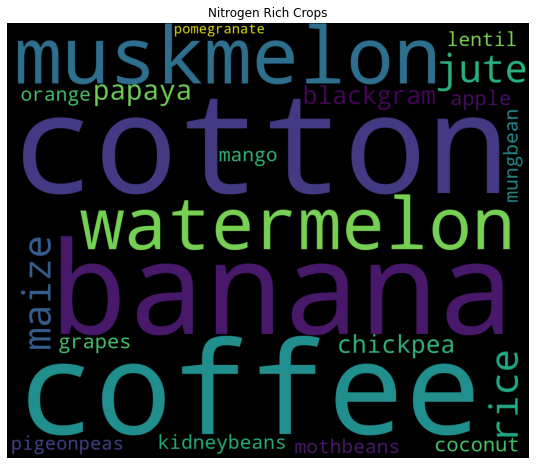

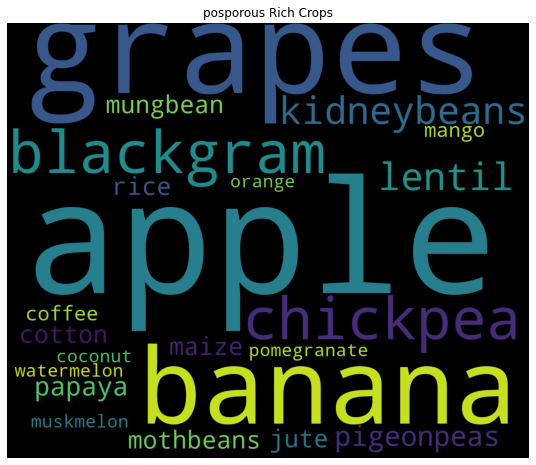

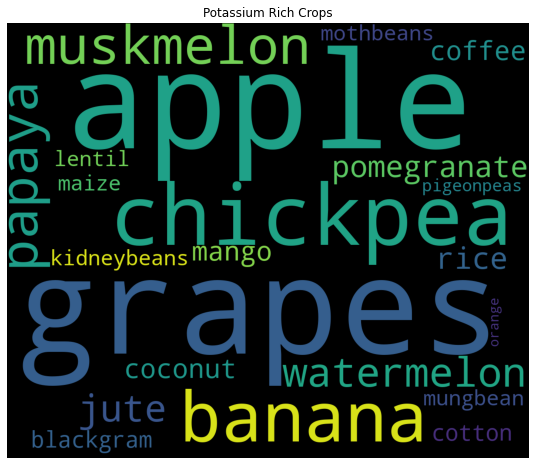

In [78]:
#Nitrogen rich crops
d =  data.groupby('label',as_index=False).max()
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','Nitrogen']].values))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Nitrogen Rich Crops')
plt.axis("off")
#posporous rich crops
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','Phosphorus']].values))
plt.figure(figsize=[20,8])
plt.imshow(wordcloud)
plt.title('posporous Rich Crops')
plt.axis("off")
#potassium rich crops
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate_from_frequencies(dict(d[['label','Potassium(K)']].values))
plt.figure(figsize=[20,8])
plt.imshow(wordcloud)
plt.title('Potassium Rich Crops')
plt.axis("off")
plt.show()

- There are very few crops which require Phosphorus and pottasium in high ammount than Nitrogen , <b>Apple</b> and <b>grapes</b> are among them.

# Model

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [82]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Soil_type_based_on_ph'] = labelencoder.fit_transform(data['Soil_type_based_on_ph'])

X = data.drop('label',axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Decision tree

#####  Ginnny

In [89]:
decison_tree_ginny = DecisionTreeClassifier(random_state=42)
tree = decison_tree_ginny.fit(X_train,y_train)
y_predicted_train = decison_tree_ginny.predict(X_train)
# report for train
print(classification_report(y_true=y_train,y_pred=y_predicted_train))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        62
      banana       1.00      1.00      1.00        72
   blackgram       1.00      1.00      1.00        71
    chickpea       1.00      1.00      1.00        59
     coconut       1.00      1.00      1.00        65
      coffee       1.00      1.00      1.00        67
      cotton       1.00      1.00      1.00        67
      grapes       1.00      1.00      1.00        75
        jute       1.00      1.00      1.00        65
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        72
       maize       1.00      1.00      1.00        68
       mango       1.00      1.00      1.00        66
   mothbeans       1.00      1.00      1.00        62
    mungbean       1.00      1.00      1.00        67
   muskmelon       1.00      1.00      1.00        74
      orange       1.00      1.00      1.00        73
      papaya       1.00    

In [90]:
#classification report for test data
y_predicted_test = decison_tree_ginny.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_predicted_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       0.96      0.93      0.95        28
   blackgram       1.00      0.97      0.98        29
    chickpea       1.00      0.98      0.99        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       0.97      0.97      0.97        33
      grapes       1.00      1.00      1.00        25
        jute       0.89      0.89      0.89        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.97      1.00      0.98        28
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        34
   mothbeans       0.97      0.97      0.97        38
    mungbean       0.97      1.00      0.99        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       0.95    

- We can see Decision tree is overfitting , lets try with Entropy selection criteria

##### Entropy

In [96]:
#Decision tree with entropy critian
decison_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree = decison_tree_entropy.fit(X_train,y_train)
y_predicted_train = decison_tree_entropy.predict(X_train)
# report for train
print('Report for Train Data')
print(classification_report(y_true=y_train,y_pred=y_predicted_train))

Report for Train Data
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        62
      banana       1.00      1.00      1.00        72
   blackgram       1.00      1.00      1.00        71
    chickpea       1.00      1.00      1.00        59
     coconut       1.00      1.00      1.00        65
      coffee       1.00      1.00      1.00        67
      cotton       1.00      1.00      1.00        67
      grapes       1.00      1.00      1.00        75
        jute       1.00      1.00      1.00        65
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        72
       maize       1.00      1.00      1.00        68
       mango       1.00      1.00      1.00        66
   mothbeans       1.00      1.00      1.00        62
    mungbean       1.00      1.00      1.00        67
   muskmelon       1.00      1.00      1.00        74
      orange       1.00      1.00      1.00        73
     

In [97]:
#classification report for test data
y_predicted_test = decison_tree_entropy.predict(X_test)
print('Report for test data')
print(classification_report(y_true=y_test,y_pred=y_predicted_test))

Report for test data
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      0.96      0.98        28
   blackgram       0.85      0.97      0.90        29
    chickpea       1.00      0.98      0.99        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.82      0.91      0.86        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.97      1.00      0.98        28
       maize       1.00      0.91      0.95        32
       mango       1.00      1.00      1.00        34
   mothbeans       0.97      0.92      0.95        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      

- Decision tree with entropy is also getting overfit , hyperparameter tuning can help
- Among ginni and entropy , Decision tree with ginni cretian is best model to do hyperparameter tuning

In [107]:
# pruning with ccp alpha 
path=tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.00065817, 0.00116302, 0.00118725, 0.00133719,
       0.00211066, 0.00244233, 0.00248008, 0.00262617, 0.00263617,
       0.0038961 , 0.00391791, 0.00633198, 0.00744409, 0.00751487,
       0.00763855, 0.00852132, 0.00887251, 0.01602808, 0.02847741,
       0.03141252, 0.03259186, 0.03498083, 0.03632238, 0.03825602,
       0.04114297, 0.04184903, 0.0436561 , 0.04407292, 0.04508011,
       0.04605374, 0.04674169, 0.04996827])

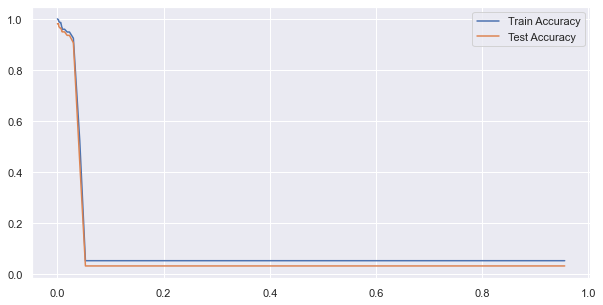

In [72]:
from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(10,5))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.show()


## Random forest tree 